# Permutation Test

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# matplotlib configuration
import matplotlib as mpl
mpl.rcParams["axes.labelsize"] = 18
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["xtick.labelsize"] = 12
mpl.rcParams["ytick.labelsize"] = 12
mpl.rcParams["legend.fontsize"] = 12
# retina display only (e.g. MacOS)
%config InlineBackend.figure_format = 'retina'

# Example

You record current through a single ion channel and keep track of the time spent in the open conducting state each time the channel opens. You compare these data with the same data from a mutant channel. Do the mutations affect the mean duration of channel openings?

In [3]:
# wild type & mutant open times (sec)
wildtype = np.array([0.24655998, 0.03123304, 0.31368139, 1.49650532, 0.12832187,
       0.34935267, 2.98383532, 1.12113878, 0.15861886, 0.27516883,
       0.42720759, 0.17426475, 1.84332273, 0.10877985, 1.14667166,
       2.32988768, 0.05784755, 0.35274439, 0.4626705 , 1.37901267,
       0.24791951, 3.40954804, 0.75957886, 1.44010738, 0.40674733,
       0.18923373, 0.02106542, 0.18518655, 0.46054929, 0.0495918 ,
       0.11085208, 0.65779435, 1.07493697, 0.50612288, 0.78303733,
       0.12228173, 0.43658884, 1.6800473 , 0.12352458, 0.31029725,
       0.88069781, 0.46659159, 1.81515703, 1.01434052, 0.26734358,
       0.05914175, 0.0201073 , 0.53855675, 1.59137488, 1.04144133,
       1.26284325, 0.29537284, 2.72455992, 1.21634351, 0.55161951,
       2.32806358, 0.11269239, 0.99089529, 0.88089808, 0.21244177,
       1.65853625, 0.32555306, 0.69153359, 0.03342622, 0.20603588,
       0.43511114, 0.61988219, 2.97057694, 0.16839877, 0.11431244,
       0.31142475, 0.89847613, 2.1417534 , 0.07196141, 0.60744222,
       1.52247886, 0.63082777, 0.017376  , 0.79448137, 0.97516774,
       0.43276819, 0.01946382, 0.11837073, 1.54641586, 0.04213551,
       2.12926047, 0.3984313 , 1.0514363 , 0.78031812, 0.54210524,
       0.15958577, 0.81064515, 1.02833322, 0.51988239, 0.40739549,
       0.03401042, 1.75452486, 2.67366314, 2.74485553, 4.43298012,
       0.69607002, 0.5381696 , 1.13644706, 1.11227558, 0.30824618,
       0.6828126 , 0.13186313, 0.62413084, 1.09888688, 3.09358804,
       0.93738368, 0.26188339, 0.24882091, 0.60282939, 0.80508138,
       0.607837  , 0.18424062, 0.40704985, 0.78205544, 0.84019349,
       2.54559718, 0.62812591, 2.66328826, 1.21832538, 0.34188434,
       0.23257902, 1.5596835 , 1.03681494, 0.0349423 , 1.70931167,
       0.10644626, 0.35298527, 1.87397106, 0.7414128 , 0.58541078,
       2.12027864, 0.06571809, 1.49561895, 0.36197461, 1.74413081,
       2.86838629, 0.84372314, 0.07312456, 0.71949444, 1.1626651 ,
       1.30781538, 1.76497567, 0.53621761, 0.95505736, 0.1693199 ,
       3.27042108, 0.54703308, 0.15080697, 2.50760997, 1.17433651,
       0.24946284, 0.11236324, 0.12480965, 1.31809663, 0.14574832,
       0.30800121, 1.71855747, 2.023252  , 0.04119984, 0.34734773,
       0.41986252, 0.00909898, 0.11135862, 2.16905276, 0.85090965,
       2.63038505, 0.1224038 , 0.84321171, 1.45792258, 0.76928265,
       0.63458516, 0.42740428, 2.10514255, 1.58740097, 0.02258262,
       1.13778816, 1.37043   , 1.21792533, 0.01525696, 0.42689584,
       0.05580195, 0.43655734, 0.66290697, 0.07887721, 0.02050001,
       1.66132827, 1.34800154, 0.12797109, 0.11487443, 3.19207732,
       1.46984788, 0.70250445, 0.15083539, 1.21685363, 0.13611199])
mutant = np.array([0.01846449, 0.60769887, 0.06422866, 0.32666559, 0.51081403,
       0.35508601, 0.20799814, 0.72069353, 0.043802  , 0.02550264,
       0.62444094, 1.1328351 , 0.31702801, 0.9321527 , 0.02285683,
       0.09135451, 0.03663395, 1.10473947, 0.31303476, 1.55687111,
       2.18939506, 0.75767346, 0.42026131, 0.52136219, 0.22566564,
       0.17751564, 0.65098857, 0.47757111, 2.22315373, 1.432279  ,
       0.31031303, 0.376733  , 0.46315748, 0.0876808 , 0.01303209,
       0.57183775, 0.13106498, 0.24353342, 0.01515397, 0.43155926,
       0.15686351, 0.95976211, 0.09033904, 0.56964079, 1.04356712,
       0.55900389, 0.3401956 , 0.48861047, 0.52627838, 0.7446047 ,
       0.86026497, 0.23089549, 0.08339691, 0.11194573, 0.09585543,
       0.29514996, 0.06894414, 0.14938336, 0.0772277 , 0.52583   ,
       0.60229886, 0.13997763, 0.45054554, 1.48054394, 0.28184967,
       0.00315106, 0.66181903, 0.08115237, 0.51276137, 0.16929419,
       0.51680295, 0.63424315, 0.42745693, 0.20721901, 0.2150683 ,
       0.71137993, 0.65666455, 0.66777768, 0.2488329 , 0.38170612,
       1.33391612, 1.24679948, 0.25813257, 0.67063106, 0.21246363,
       1.31380873, 0.25886277, 0.29488219, 0.67463683, 0.84724443,
       1.46947982, 0.07630153, 0.2215952 , 0.27235748, 1.63236883,
       0.04383044, 0.04311423, 0.17082691, 0.21446369, 0.207039  ,
       0.42689952, 0.04194099, 0.46003057, 0.04305948, 0.45853974,
       0.41057587, 0.21002527, 0.11823019, 1.13243613, 0.3486579 ,
       0.04904961, 0.08387019, 0.28437323, 0.19840147, 0.24908427,
       1.09075637, 0.44202793, 0.34348781, 0.48828531, 1.02894449,
       0.16042321, 0.09594642, 0.39066082, 0.01029814, 0.14830936,
       1.5893804 , 0.06244083, 1.02519165, 0.25167622, 0.36853598,
       0.20386486, 0.96940119, 0.03443601, 0.19843723, 0.23700801,
       0.10174005, 0.03203635, 0.03184418, 0.73339824, 0.29632663,
       0.01811347, 0.36058837, 0.14580983, 0.05059694, 2.25611387,
       1.0328223 , 0.02444921, 0.05579824, 0.04890027, 1.79206503,
       0.27858333, 0.03991044, 0.40703939, 1.81194188, 0.04698565,
       1.80833629, 0.80040085, 0.23835303, 0.23969697, 0.07963567,
       0.35717091, 2.890885  , 0.02961757, 0.06560042, 1.15053169,
       0.07551622, 0.20613913, 0.0517843 , 1.23600723, 0.40082028,
       0.00597626, 0.01289223, 0.05099811, 0.12662634, 0.84031793,
       0.74074358, 0.11280244, 0.88976487, 0.33576111, 0.10822683])

In [18]:
# mean open times (sec)
wildtype.mean(), mutant.mean()

(0.87057898795, 0.47387915472222225)

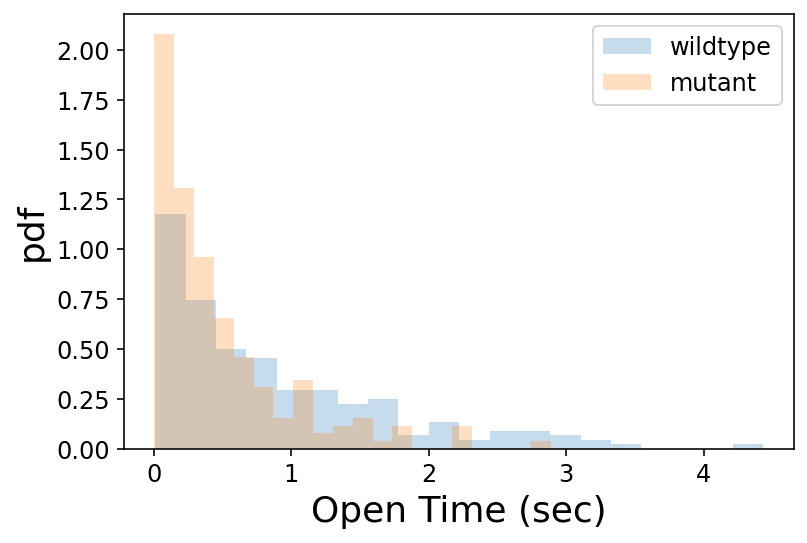

In [4]:
plt.hist(wildtype, bins=20, density=True, alpha=0.25, label='wildtype')
plt.hist(mutant, bins=20, density=True, alpha=0.25, label='mutant')
plt.xlabel('Open Time (sec)');
plt.ylabel('pdf')
plt.legend();

Open times are exponentially, not normally distributed, so we cannot use a t-Test to compare sample means.

But we can always use a permutation test.

Use a permutation test to decide whether or not the mutation had any effect on the channel's mean open time?

In [10]:
# concatenate all open times from both wild type and mutant into one big array
all_open_times = np.hstack([wildtype, mutant])

# Generate 1000 permutations of mixtures of open times from both wildtype and mutant.
# For each permutation store the difference between the means of the permuted data sets.
num_permutations = 1000
permuted_mean_diffs = np.zeros((num_permutations,))

for i in range(num_permutations):
    # shuffle the concatenated open time data
    np.random.shuffle(all_open_times)
    
    # split permuted open times in wildtype and mutant sample sets
    permuted_wildtype = all_open_times[:len(wildtype)]
    permuted_mutant = all_open_times[-len(mutant):]
    
    permuted_mean_diffs[i] = permuted_mutant.mean() - permuted_wildtype.mean()

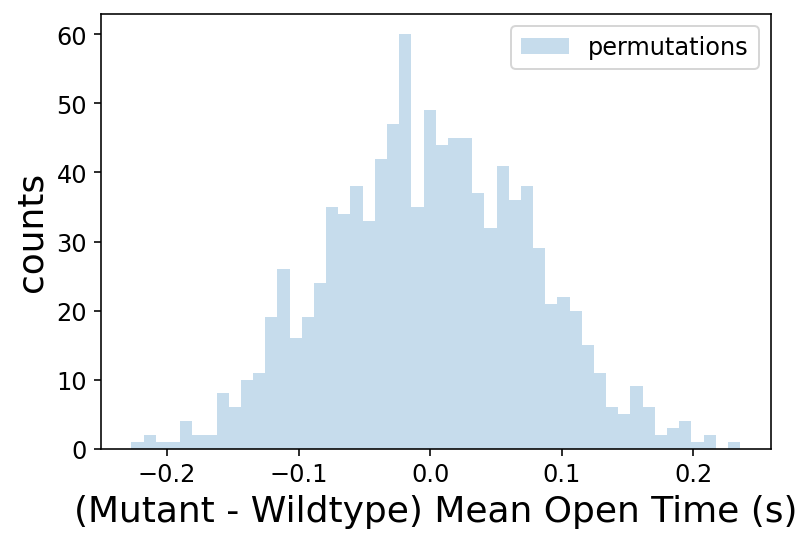

In [12]:
plt.hist(permuted_mean_diffs, bins=50, alpha=0.25, label='permutations');
plt.xlabel('(Mutant - Wildtype) Mean Open Time (s)')
plt.ylabel('counts')
plt.legend();

Get the 95% confidence interval on the difference between permuted mean open times.

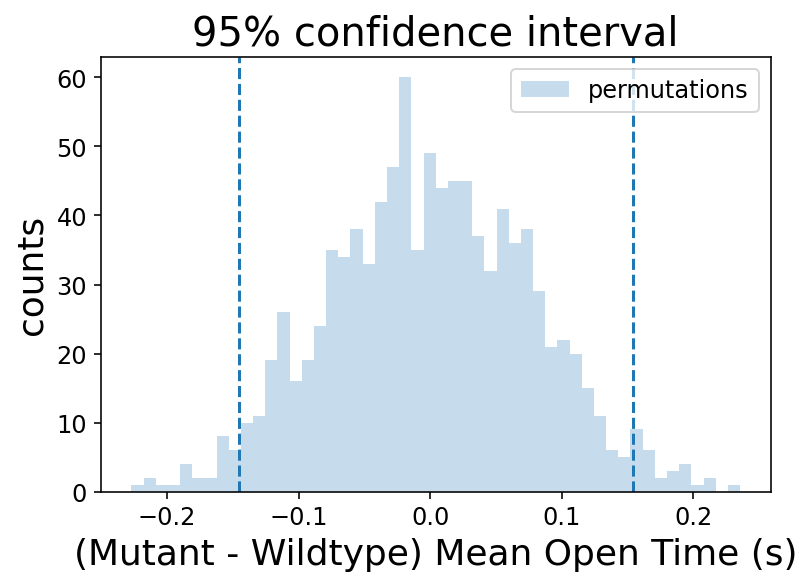

In [13]:
lb, ub = np.quantile(permuted_mean_diffs, [0.025, 0.975])

plt.hist(permuted_mean_diffs, bins=50, alpha=0.25, label='permutations');
plt.axvline(lb, ls='--')
plt.axvline(ub, ls='--');
plt.xlabel('(Mutant - Wildtype) Mean Open Time (s)')
plt.ylabel('counts')
plt.title('95% confidence interval')
plt.legend();

Compare the measured difference between mutant and wildtype mean open time with the distribution of permuted differences.

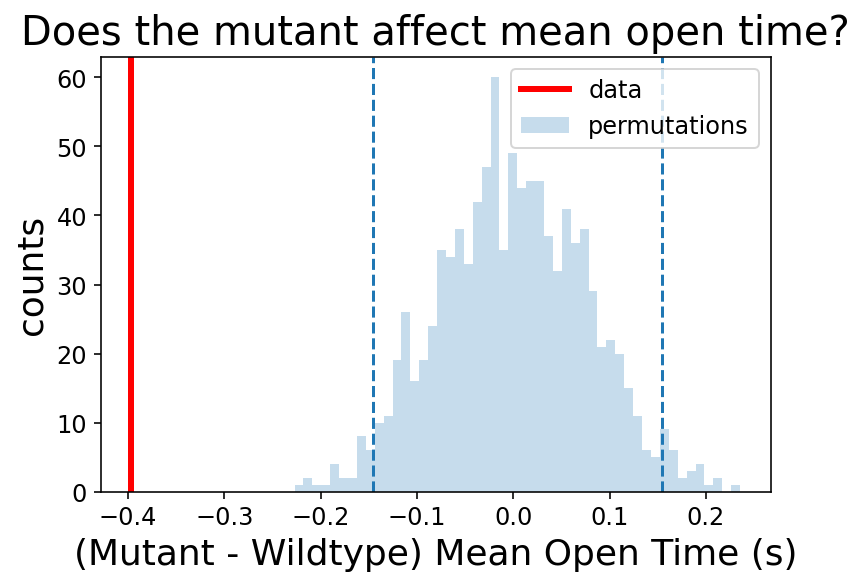

In [17]:
measured_mean_diff = mutant.mean() - wildtype.mean()

plt.hist(permuted_mean_diffs, bins=50, alpha=0.25, label='permutations');
plt.axvline(measured_mean_diff, lw=3, color='r', label='data')
plt.axvline(lb, ls='--')
plt.axvline(ub, ls='--');
plt.xlabel('(Mutant - Wildtype) Mean Open Time (s)')
plt.ylabel('counts')
plt.title('Does the mutant affect mean open time?')
plt.legend();